In [22]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

wine_load = load_wine()
wine = pd.DataFrame(wine_load.data, columns=wine_load.feature_names)
wine['Class'] = wine_load.target
wine['Class'] = wine['Class'].map({0:'class_0', 1:'class_1', 2:'class_2'})

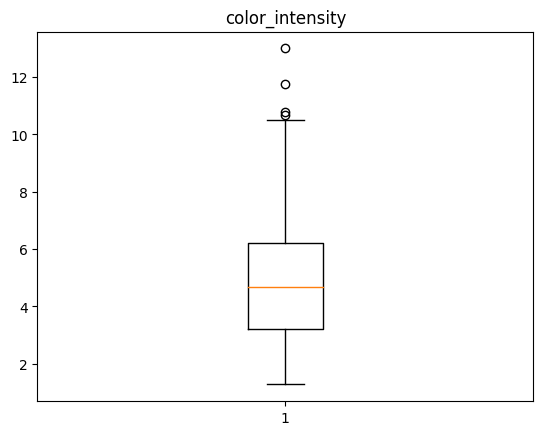

In [23]:
import matplotlib.pyplot as plt
plt.boxplot(wine['color_intensity'], whis=1.5)
plt.title('color_intensity')
plt.show()

In [24]:
import numpy as np
def outliers_iqr(dt, col):
    quartile_1, quartile_3 = np.percentile(dt[col], [25,75])
    iqr = quartile_3 - quartile_1
    lower_whis = quartile_1 - (iqr*1.5)
    upper_whis = quartile_3 + (iqr*1.5)
    outliers = dt[(dt[col] > upper_whis) | (dt[col] < lower_whis)]
    return outliers[[col]]

outliers = outliers_iqr(wine, 'color_intensity')
outliers

,color_intensity
151,10.80
158,13.00
159,11.75
166,10.68


In [26]:
drop_outliers = wine.drop(index=outliers.index)

print('Original :', wine.shape)
print('Drop outliers :', drop_outliers.shape)

Original : (178, 14)
Drop outliers : (174, 14)


In [29]:
wine.loc[outliers.index, 'color_intensity'] = np.NaN

wine['color_intensity'] = wine['color_intensity'].fillna(wine['color_intensity'].mean())
wine.loc[outliers.index, 'color_intensity']

151    4.908678
158    4.908678
159    4.908678
166    4.908678
Name: color_intensity, dtype: float64

In [40]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
iris = pd.DataFrame(iris.data, columns = iris.feature_names)
iris['Class'] = load_iris().target
iris['Class'] = iris['Class'].map({0:'Setosa', 1:'Versicolur', 2:'Virginica'})

In [42]:
iris_dummy = pd.get_dummies(iris, columns=['Class'])
iris_dummy

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class_Setosa,Class_Versicolur,Class_Virginica
0,5.1,3.5,1.4,0.2,True,False,False
1,4.9,3.0,1.4,0.2,True,False,False
2,4.7,3.2,1.3,0.2,True,False,False
3,4.6,3.1,1.5,0.2,True,False,False
4,5.0,3.6,1.4,0.2,True,False,False
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,False,False,True
146,6.3,2.5,5.0,1.9,False,False,True
147,6.5,3.0,5.2,2.0,False,False,True
148,6.2,3.4,5.4,2.3,False,False,True
